In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Machine Learning Datasets\Classification\churn_data.csv")

In [3]:
df.head(3)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
df.isnull().sum().sum()

np.int64(0)

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [6]:
df.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,1,0,0,1,2,29.85,2505,0
1,3962,34,1,1,0,3,56.95,1466,0


In [7]:
df = df.drop('customerID', axis=1)

In [8]:
df.describe()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,0.903166,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,24.559481,0.295752,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,9.000000,1.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,29.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,55.000000,1.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,72.000000,1.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


In [9]:
df.duplicated().sum().sum()

np.int64(79)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
x = df.iloc[:, :-1]
y = df['Churn']

In [12]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
for col in x:
    x[col] = ss.fit_transform(x[[col]])

## Under Sampling

In [13]:
from imblearn.under_sampling import RandomUnderSampler

In [14]:
y.value_counts()

Churn
0    5141
1    1823
Name: count, dtype: int64

In [15]:
ru = RandomUnderSampler()
ru_x, ru_y = ru.fit_resample(x, y)

In [16]:
ru_y.value_counts()

Churn
0    1823
1    1823
Name: count, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(ru_x, ru_y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [19]:
lr.score(x_test, y_test)*100

73.56164383561644

## Over Sampling

In [20]:
y.value_counts()

Churn
0    5141
1    1823
Name: count, dtype: int64

In [21]:
from imblearn.over_sampling import RandomOverSampler
ro = RandomOverSampler()
ro_x, ro_y = ro.fit_resample(x, y)

In [22]:
ro_y.value_counts()

Churn
0    5141
1    5141
Name: count, dtype: int64

In [23]:
x_train, x_test, y_train, y_test = train_test_split(ro_x, ro_y, test_size=0.2, random_state=42)

In [24]:
lr2 = LogisticRegression()
lr2.fit(x_train, y_train)

LogisticRegression()

In [26]:
lr2.score(x_test, y_test)*100

76.27613028682548

## Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [28]:
cm = confusion_matrix(y_test, lr2.predict(x_test))

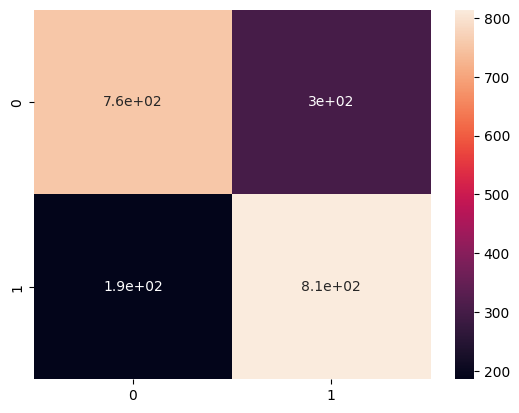

In [29]:
sns.heatmap(cm, annot=True)
plt.show()

In [32]:
print(precision_score(y_test, lr.predict(x_test))*100)
print(recall_score(y_test, lr.predict(x_test))*100)
print(f1_score(y_test, lr.predict(x_test))*100)

72.82321899736148
82.8
77.4918109499298


## Naive Bayes Algorithm

In [33]:
ros = RandomOverSampler()
ros_x, ros_y = ros.fit_resample(x, y)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(ros_x, ros_y, test_size=0.2, random_state=42)

In [35]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [36]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [38]:
gnb.score(x_test, y_test)*100

74.23432182790471

In [42]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

BernoulliNB()

In [43]:
bnb.score(x_test, y_test)*100

73.55371900826447

In [ ]:
gnb.predict[[]]